# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

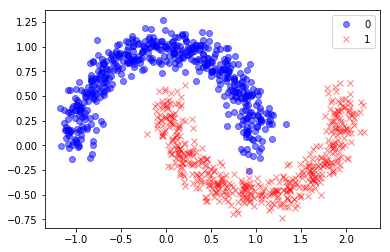

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

Using TensorFlow backend.


### Shallow Model

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 328us/step


In [10]:
results

[0.3166323614120483, 0.8433333341280619]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.843


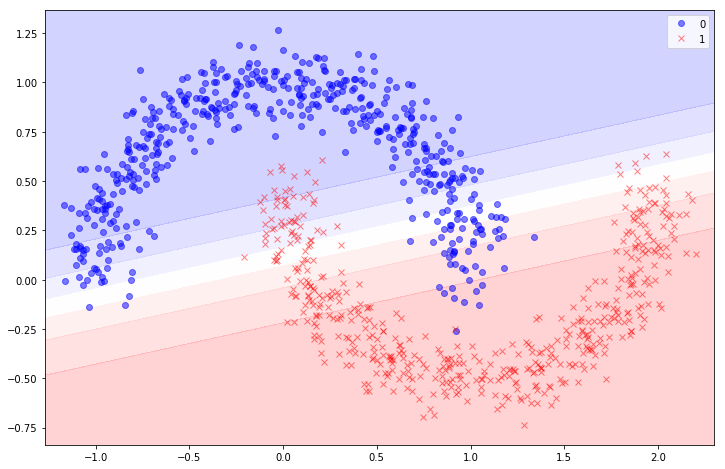

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [13]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 421us/step


[0.010702432667215666, 0.9933333333333333]

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.997
The Accuracy score on the Test set is:	0.993


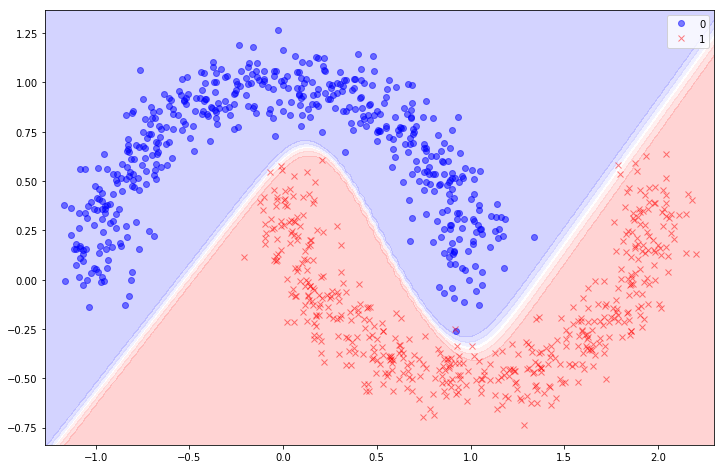

In [18]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [19]:
df = pd.read_csv('../data/iris.csv')

/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


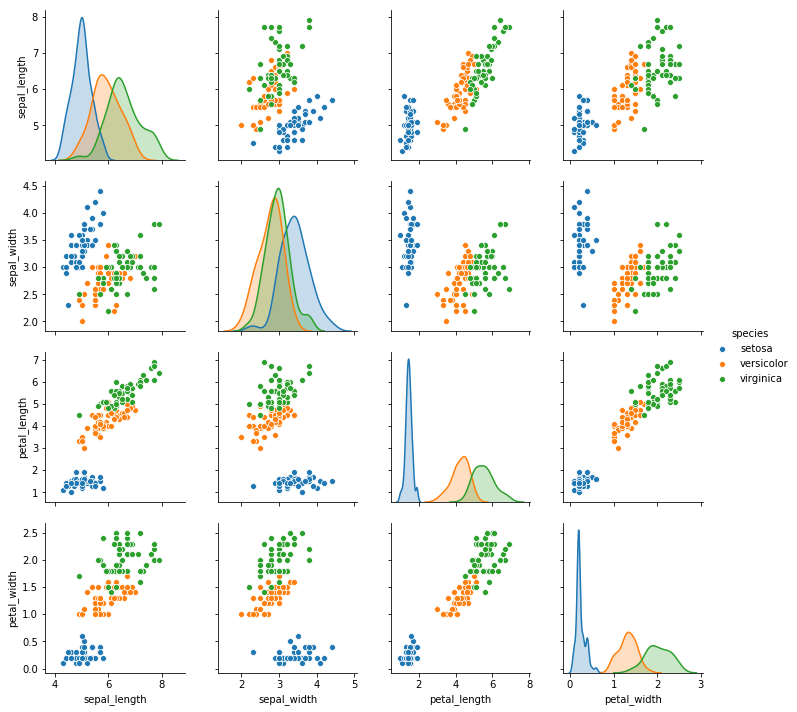

In [20]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [24]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [25]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [26]:
from keras.utils.np_utils import to_categorical

In [27]:
y_cat = to_categorical(y)

In [28]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [30]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 1s 5ms/step - loss: 3.8917 - acc: 0.3611 - val_loss: 3.0944 - val_acc: 0.3333
Epoch 2/20
108/108 [==============================] - 0s 114us/step - loss: 1.9857 - acc: 0.3241 - val_loss: 1.3794 - val_acc: 0.2500
Epoch 3/20
108/108 [==============================] - 0s 80us/step - loss: 1.5698 - acc: 0.2222 - val_loss: 1.0995 - val_acc: 0.5833
Epoch 4/20
108/108 [==============================] - 0s 111us/step - loss: 0.9240 - acc: 0.4815 - val_loss: 0.8793 - val_acc: 0.4167
Epoch 5/20
108/108 [==============================] - 0s 360us/step - loss: 0.8767 - acc: 0.2963 - val_loss: 0.8165 - val_acc: 0.4167
Epoch 6/20
108/108 [==============================] - 0s 114us/step - loss: 0.6856 - acc: 0.6759 - val_loss: 0.5078 - val_acc: 0.8333
Epoch 7/20
108/108 [==============================] - 0s 78us/step - loss: 0.5613 - acc: 0.6296 - val_loss: 0.4576 - val_acc: 0.7500
Epoch 8/20
108/108 [=

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred[:5]

array([[0.00292773, 0.25301322, 0.744059  ],
       [0.02901729, 0.7126517 , 0.258331  ],
       [0.03495944, 0.57986   , 0.38518053],
       [0.2056123 , 0.6722631 , 0.12212458],
       [0.00847051, 0.32944384, 0.66208565]], dtype=float32)

In [34]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.89      0.94         9
           2       0.89      1.00      0.94         8

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [37]:
confusion_matrix(y_test_class, y_pred_class)

array([[13,  0,  0],
       [ 0,  8,  1],
       [ 0,  0,  8]])

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [97]:
df = pd.read_csv("../data/diabetes.csv")

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


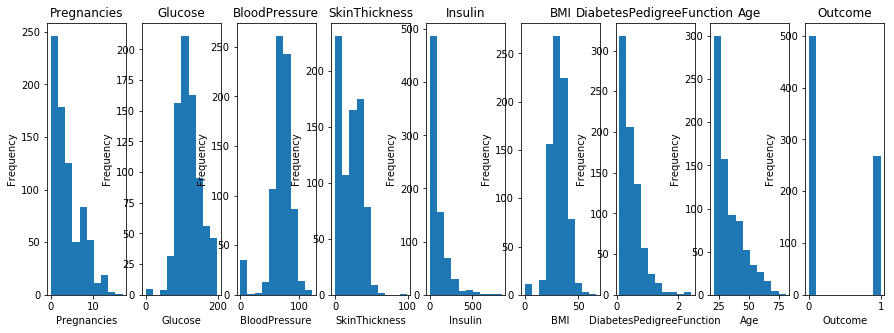

In [100]:
plt.figure(figsize=(15, 5))

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

for i, feature in enumerate(numeric_columns):
    plt.subplot(1, len(numeric_columns), i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d142100b8>,
      dtype=object)

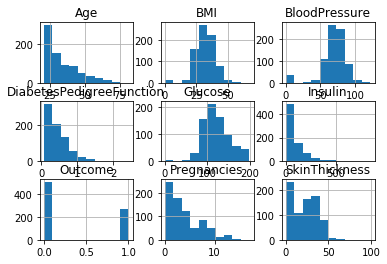

In [105]:
df.hist()

/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc

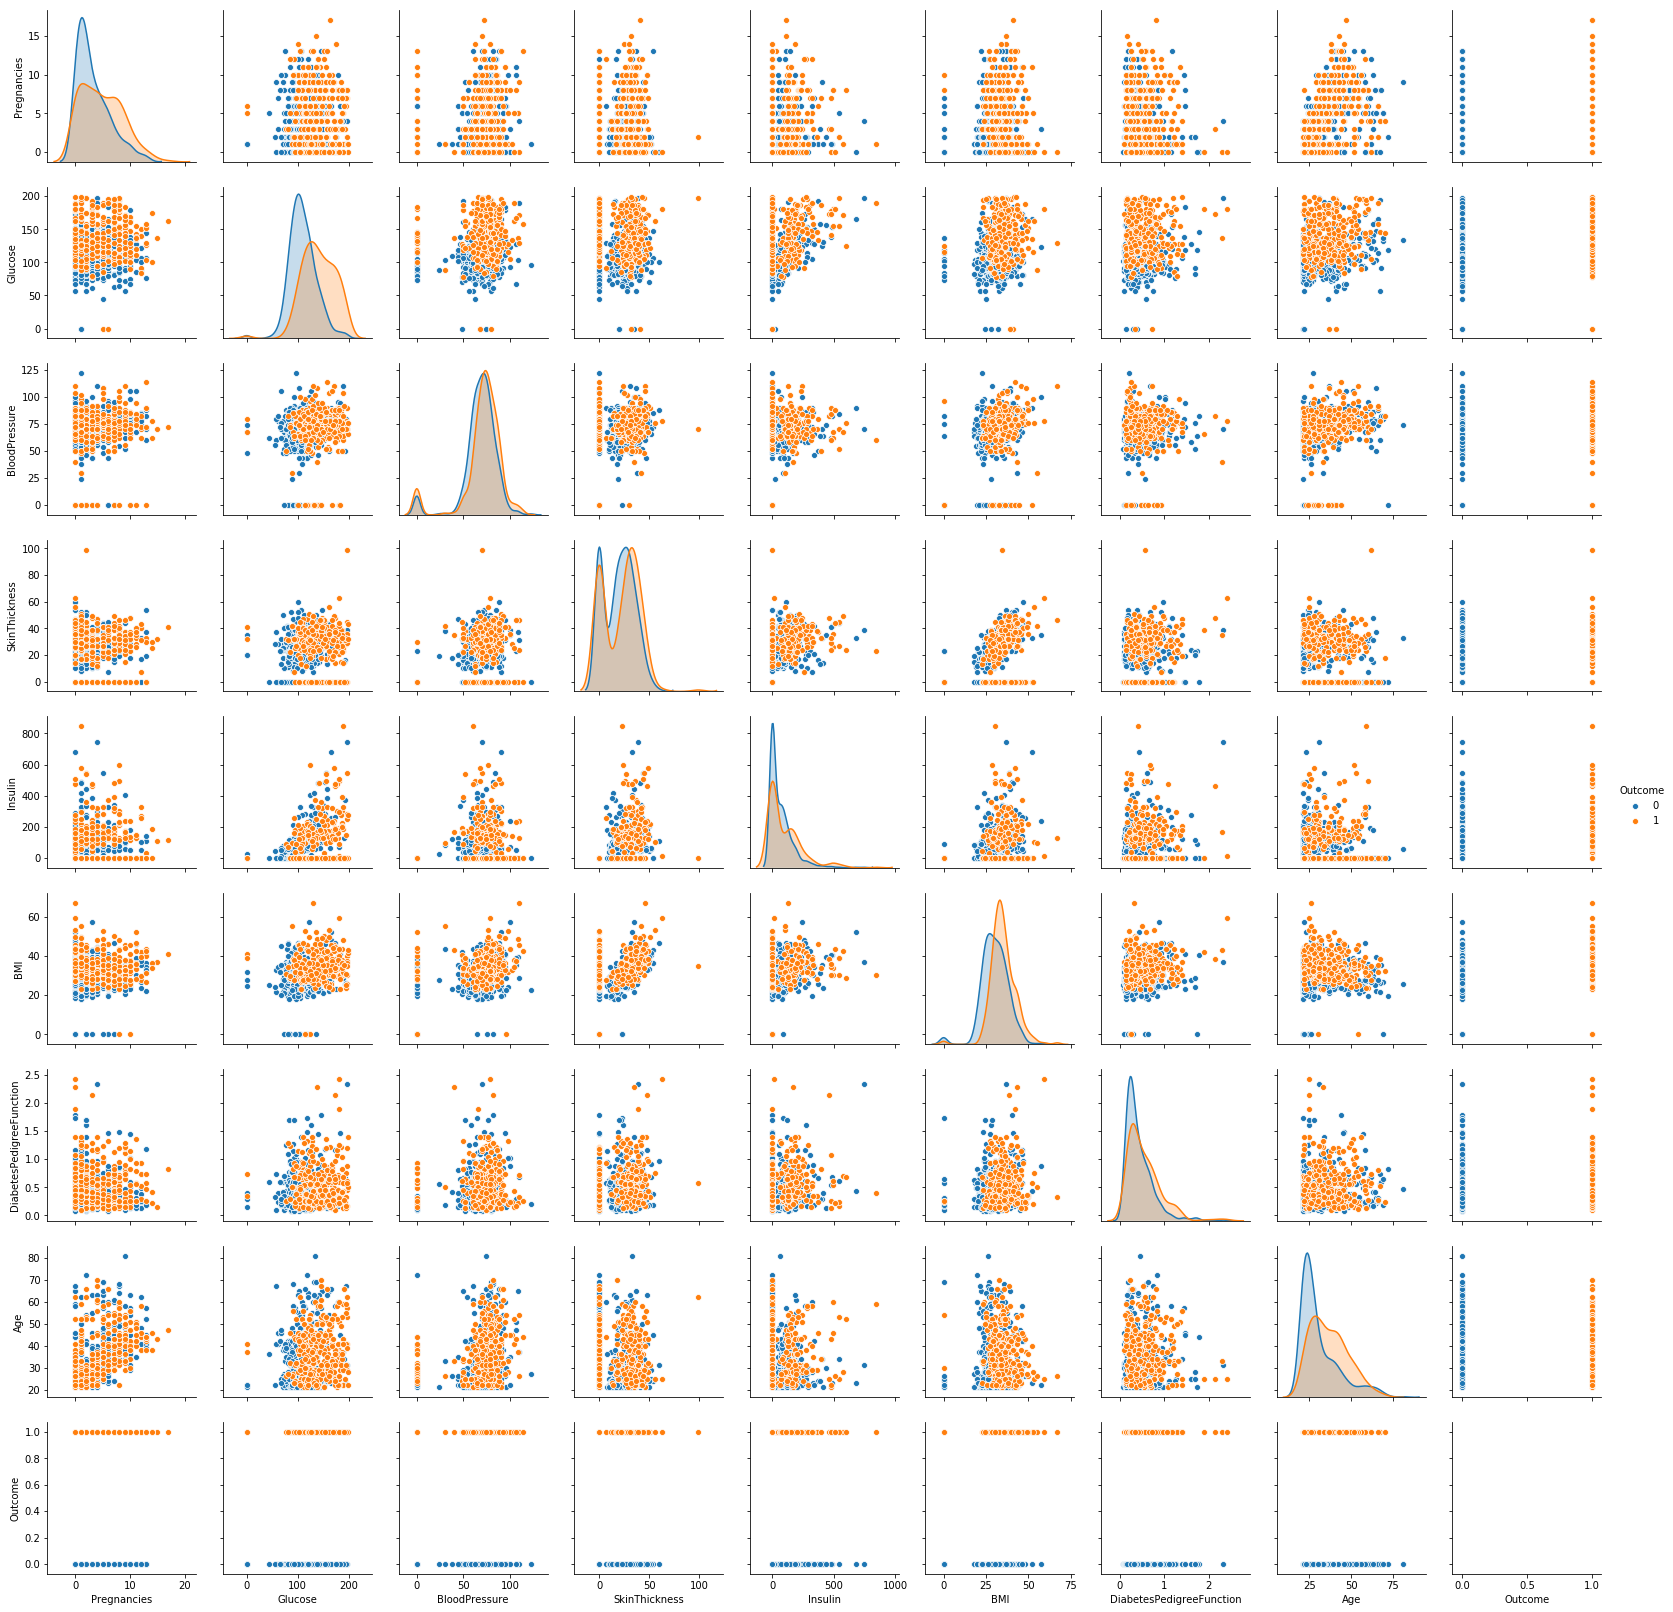

In [101]:
sns.pairplot(df, hue="Outcome")

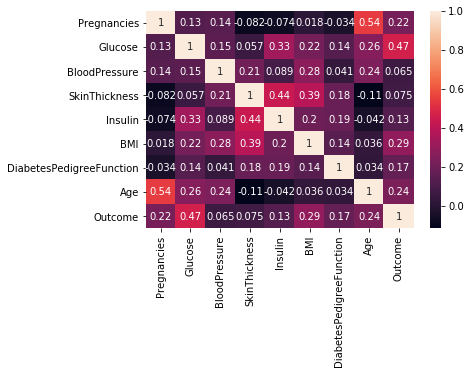

In [104]:
sns.heatmap(df.corr(), annot=True)

In [84]:
# Would need to rescale these to be in the interval 0-1 ideally

# Normally distributed which can be rescaled with standard scaler
# Glucose
# BloodPressure (has anomalys at 0 but these don't make any sense as you'd be dead)
# BMI

normal_features = [
    "Glucose",
    "BloodPressure",
    "BMI"
]
# Manually scale as non normal
non_normall_features = [
    #"Pregnancies", # small enough scale to not scale
    "SkinThickness",
    "Insulin",
    #"DiabetesPedigreeFunction" # small enough scale to not scale
    "Age",
]


In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Going to Standard Scale them to maintain the distributions

df["Glucose_ss"] = scaler.fit_transform(df[["Glucose"]])
df["BloodPressure_ss"] = scaler.fit_transform(df[["BloodPressure"]])
df["BMI_ss"] = scaler.fit_transform(df[["BMI"]])

df["SkinThickness_ss"] = scaler.fit_transform(df[["SkinThickness"]])
df["Insulin_ss"] = scaler.fit_transform(df[["Insulin"]])
df["Age_ss"] = scaler.fit_transform(df[["Age"]])


/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocess

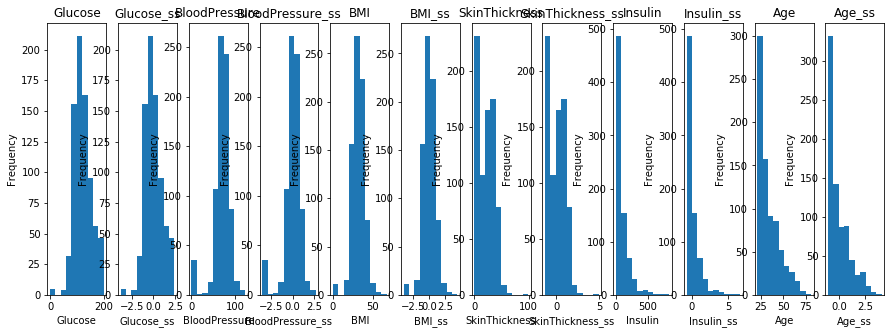

In [94]:
# Look at the distributions of the scaled features vs the non scaled features

features_and_scaled_features = [
    "Glucose",
    "Glucose_ss",
    
    "BloodPressure",
    "BloodPressure_ss",
    
    "BMI",
    "BMI_ss",
    
    "SkinThickness",
    "SkinThickness_ss",
    
    "Insulin",
    "Insulin_ss",
    
    "Age",
    "Age_ss",
]


plt.figure(figsize=(15, 5))

for i, feature in enumerate(features_and_scaled_features):
    plt.subplot(1, len(features_and_scaled_features), i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [87]:
# The Standard scaler has maintained the shape of their distributions 

In [88]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [89]:
# Not balanced so need to stratify training data

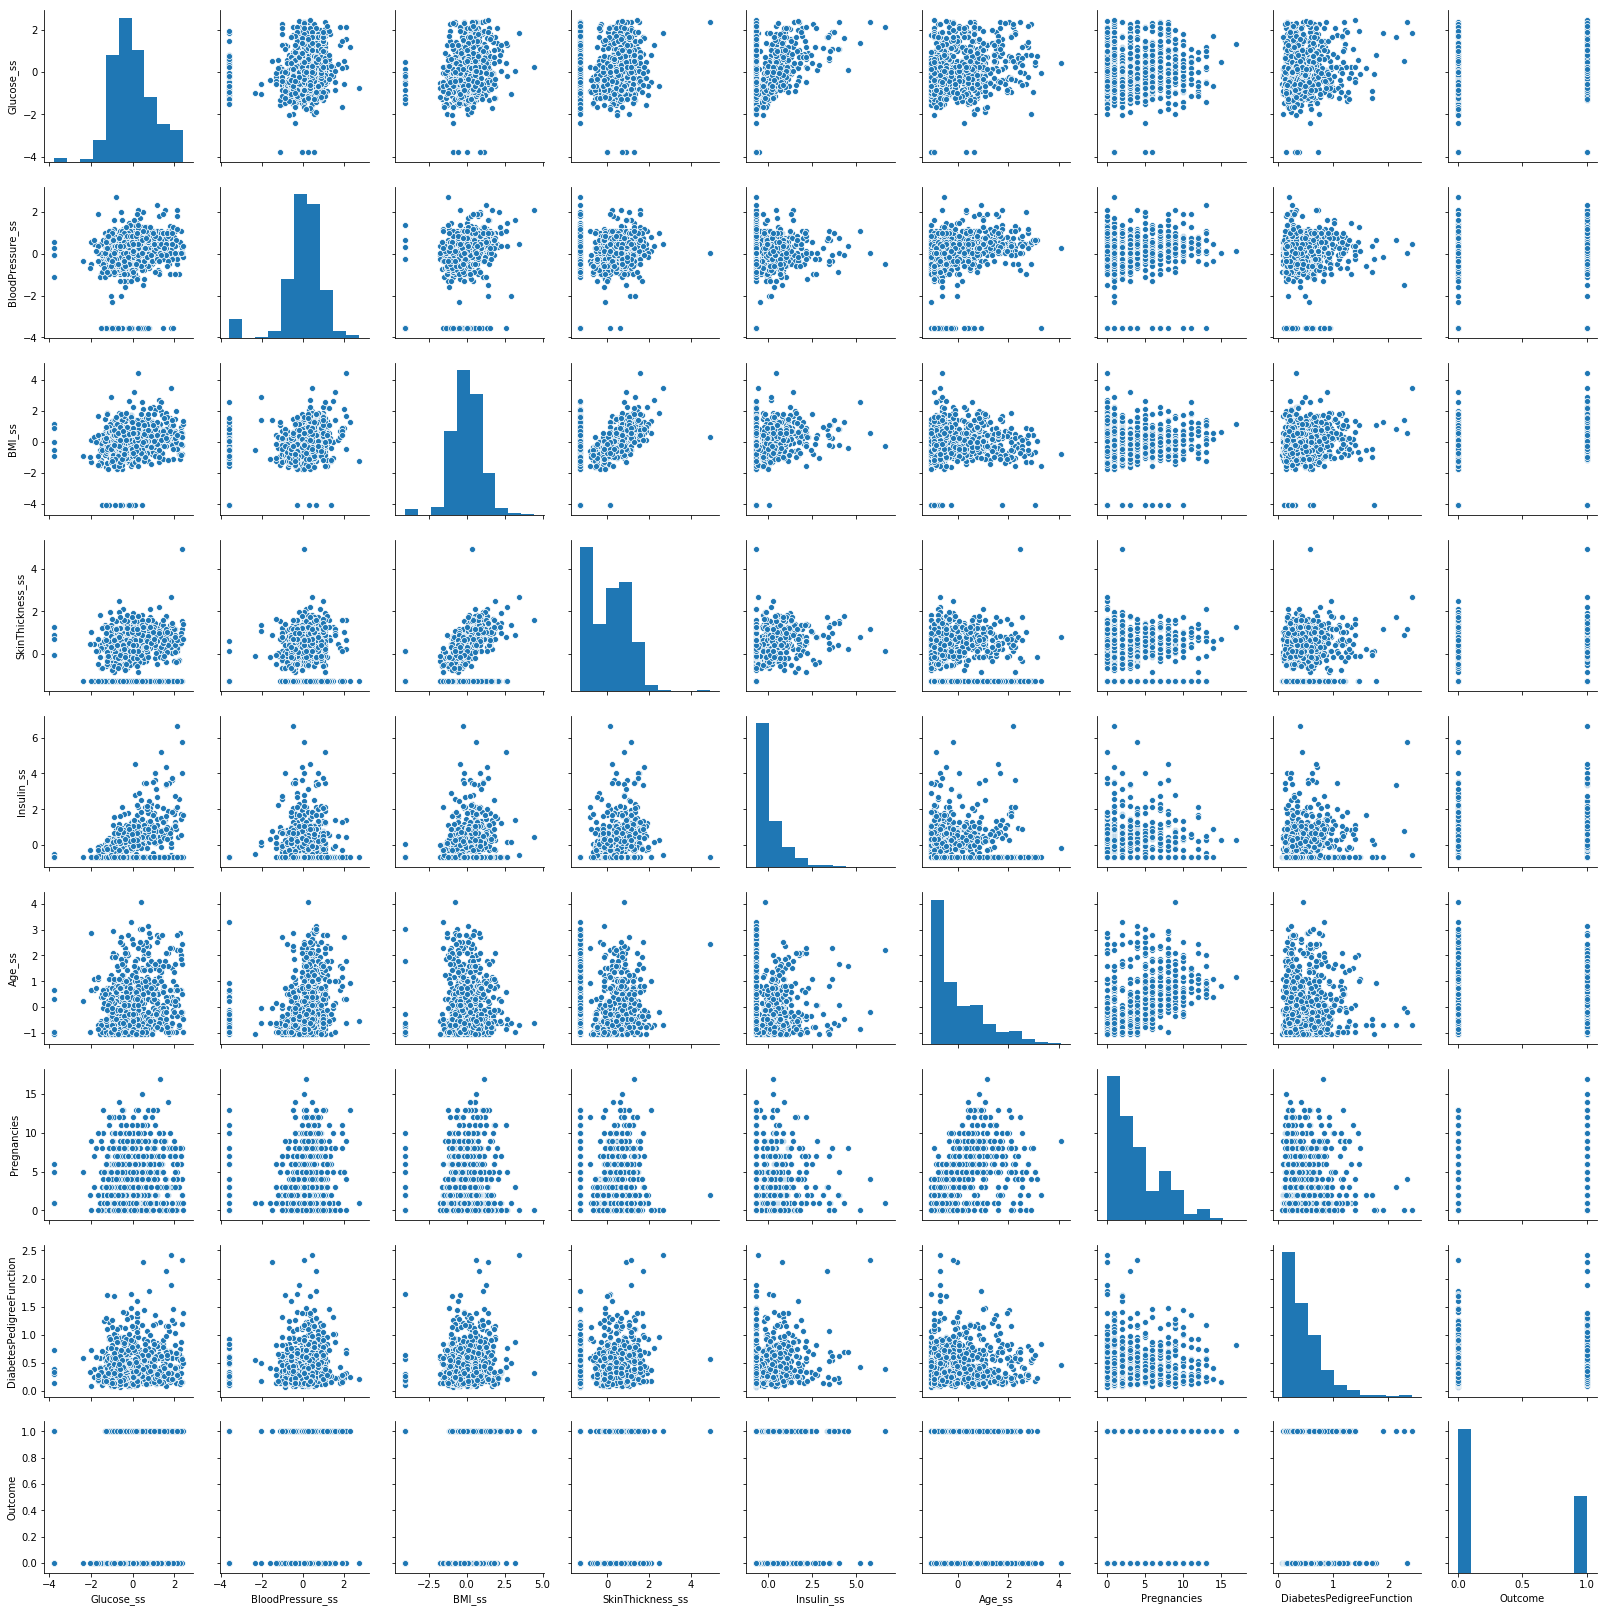

In [91]:
features = [
    "Glucose_ss",
    "BloodPressure_ss",
    "BMI_ss",
    "SkinThickness_ss",
    "Insulin_ss",    
    "Age_ss",
    
    "Pregnancies",
    "DiabetesPedigreeFunction",
]
target_variable = ["Outcome"]
sns.pairplot(df[features+target_variable])

In [ ]:
# There are some weak correlations# Nothing looks correlated in a separable way with the outcome

In [95]:
X = df[features].values
y = df[target_variable].values

In [144]:
# Convert binary classification variable to categorical
from keras.utils import to_categorical
y_cat = to_categorical(y)

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, train_size=0.2, random_state=22)

In [146]:
number_of_inputs = X.shape[1]

In [148]:
# if you fit with keras to_categorical you have to use the softmax for multi-category, 
# can use sigmoid single output with non to_categorical 
model = Sequential()
model.add(Dense(16, input_shape=(number_of_inputs,), activation='relu'))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(Adam(lr=0.05), "categorical_crossentropy", metrics=["accuracy"])

In [149]:
model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Train on 137 samples, validate on 16 samples
Epoch 1/100
137/137 [==============================] - 1s 10ms/step - loss: 0.7362 - acc: 0.6277 - val_loss: 0.5973 - val_acc: 0.5625
Epoch 2/100
137/137 [==============================] - 0s 145us/step - loss: 0.5371 - acc: 0.7372 - val_loss: 0.4906 - val_acc: 0.7500
Epoch 3/100
137/137 [==============================] - 0s 104us/step - loss: 0.5239 - acc: 0.7445 - val_loss: 0.4783 - val_acc: 0.8125
Epoch 4/100
137/137 [==============================] - 0s 110us/step - loss: 0.4924 - acc: 0.7810 - val_loss: 0.5112 - val_acc: 0.6250
Epoch 5/100
137/137 [==============================] - 0s 114us/step - loss: 0.4605 - acc: 0.7883 - val_loss: 0.4597 - val_acc: 0.8125
Epoch 6/100
137/137 [==============================] - 0s 108us/step - loss: 0.4322 - acc: 0.7810 - val_loss: 0.5058 - val_acc: 0.6875
Epoch 7/100
137/137 [==============================] - 0s 111us/step - loss: 0.4241 - acc: 0.7956 - val_loss: 0.5118 - val_acc: 0.6875
Epoch 8/100

Epoch 61/100
137/137 [==============================] - 0s 78us/step - loss: 0.2165 - acc: 0.8832 - val_loss: 0.8440 - val_acc: 0.8750
Epoch 62/100
137/137 [==============================] - 0s 87us/step - loss: 0.1970 - acc: 0.8905 - val_loss: 0.8414 - val_acc: 0.8125
Epoch 63/100
137/137 [==============================] - 0s 307us/step - loss: 0.1919 - acc: 0.8978 - val_loss: 0.8772 - val_acc: 0.8125
Epoch 64/100
137/137 [==============================] - 0s 88us/step - loss: 0.1695 - acc: 0.9051 - val_loss: 0.9626 - val_acc: 0.8125
Epoch 65/100
137/137 [==============================] - 0s 88us/step - loss: 0.1615 - acc: 0.9051 - val_loss: 0.8749 - val_acc: 0.8750
Epoch 66/100
137/137 [==============================] - 0s 131us/step - loss: 0.1701 - acc: 0.8978 - val_loss: 0.9457 - val_acc: 0.8750
Epoch 67/100
137/137 [==============================] - 0s 78us/step - loss: 0.1423 - acc: 0.9197 - val_loss: 1.1132 - val_acc: 0.8750
Epoch 68/100
137/137 [==============================]

In [151]:
y_pred = model.predict(X_test)

In [153]:
# These are for binary_crossentropy with a sigmoid output

#y_train_pred = model.predict_classes(X_train)
#y_test_pred = model.predict_classes(X_test) 

y_test_class = np.argmax(y_test, axis=1) # Puts the probabilites to the classification
y_pred_class = np.argmax(y_pred, axis=1)

print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test_class, y_pred_class)))

The Accuracy score on the Test set is:	0.701


In [154]:
print(classification_report(y_pred_class, y_test_class))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75       328
           1       0.74      0.56      0.63       287

   micro avg       0.70      0.70      0.70       615
   macro avg       0.71      0.69      0.69       615
weighted avg       0.71      0.70      0.69       615



In [155]:
confusion_matrix(y_test_class, y_pred_class)

array([[271, 127],
       [ 57, 160]])

In [158]:
# What is the benchmark, based off class imbalance

pd.Series(y_test_class).value_counts() / len(y_test_class)

0    0.647154
1    0.352846
dtype: float64

In [ ]:
# Not very good as could just say not diabetic and be right 64% anyway

## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

In [161]:
df = pd.read_csv("../data/diabetes.csv")

In [162]:
features = [
    "Glucose",
    "BloodPressure",
    "BMI",
    #"SkinThickness",
    "Insulin",    
    #"Age",
    #"Pregnancies",
    #"DiabetesPedigreeFunction",
]
target_variable = ["Outcome"]

In [164]:
scaler = StandardScaler()
X = scaler.fit_transform(df[features])
y = df[target_variable]

y_cat = to_categorical(y)

/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, train_size=0.2, random_state=22)

/home/josephw/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [166]:
number_of_inputs = X.shape[1]

In [167]:
# if you fit with keras to_categorical you have to use the softmax for multi-category, 
# can use sigmoid single output with non to_categorical 
model = Sequential()
model.add(Dense(16, input_shape=(number_of_inputs,), activation='relu'))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(Adam(lr=0.05), "categorical_crossentropy", metrics=["accuracy"])

In [169]:
model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Train on 137 samples, validate on 16 samples
Epoch 1/100
137/137 [==============================] - 0s 383us/step - loss: 0.5682 - acc: 0.7518 - val_loss: 0.5971 - val_acc: 0.8125
Epoch 2/100
137/137 [==============================] - 0s 165us/step - loss: 0.5441 - acc: 0.7226 - val_loss: 0.6829 - val_acc: 0.8125
Epoch 3/100
137/137 [==============================] - 0s 155us/step - loss: 0.5270 - acc: 0.7737 - val_loss: 0.6457 - val_acc: 0.8125
Epoch 4/100
137/137 [==============================] - 0s 141us/step - loss: 0.5007 - acc: 0.7810 - val_loss: 0.6530 - val_acc: 0.8125
Epoch 5/100
137/137 [==============================] - 0s 127us/step - loss: 0.4893 - acc: 0.7956 - val_loss: 0.7092 - val_acc: 0.8125
Epoch 6/100
137/137 [==============================] - 0s 263us/step - loss: 0.4809 - acc: 0.7956 - val_loss: 0.8063 - val_acc: 0.8125
Epoch 7/100
137/137 [==============================] - 0s 101us/step - loss: 0.4717 - acc: 0.7810 - val_loss: 0.7851 - val_acc: 0.8125
Epoch 8/10

137/137 [==============================] - 0s 87us/step - loss: 0.2005 - acc: 0.9051 - val_loss: 1.9712 - val_acc: 0.6875
Epoch 62/100
137/137 [==============================] - 0s 250us/step - loss: 0.1955 - acc: 0.9051 - val_loss: 1.8847 - val_acc: 0.7500
Epoch 63/100
137/137 [==============================] - 0s 89us/step - loss: 0.1957 - acc: 0.8978 - val_loss: 2.0722 - val_acc: 0.7500
Epoch 64/100
137/137 [==============================] - 0s 82us/step - loss: 0.2074 - acc: 0.9051 - val_loss: 2.1311 - val_acc: 0.7500
Epoch 65/100
137/137 [==============================] - 0s 88us/step - loss: 0.1900 - acc: 0.9051 - val_loss: 1.9592 - val_acc: 0.7500
Epoch 66/100
137/137 [==============================] - 0s 93us/step - loss: 0.1923 - acc: 0.9051 - val_loss: 2.0009 - val_acc: 0.7500
Epoch 67/100
137/137 [==============================] - 0s 94us/step - loss: 0.1906 - acc: 0.9051 - val_loss: 2.2027 - val_acc: 0.6875
Epoch 68/100
137/137 [==============================] - 0s 331us/st

In [170]:
y_pred = model.predict(X_test)

In [171]:
# Force probability to class
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

In [173]:
# Diagnostics

In [174]:
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test_class, y_pred_class)))

The Accuracy score on the Test set is:	0.709


In [175]:
confusion_matrix(y_pred_class, y_test_class)

array([[339, 120],
       [ 59,  97]])

## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.
